#  __Exploring Global Health Data: Hypertension__
***
# Introduction 
According to a report from WHO it is highlighted that  in 2021 Noncommunicable diseases(NCDs) killed at least 43 million people which was an equivalent of 75% of non pandemic- related deaths globally. This is such a great percentage and shows the need for intervention hence the analysis. 
There are several NCDs , but the most prevelant are cardiovascular diseases, cancer and Diabetes.

In this analysis the focus is on Hypertension.Hypertension (high blood pressure) is when the pressure in your blood vessels is too high (140/90 mmHg).By 2023 1.28 billion adults aged 30-79 years had hypertension.It is noted that Hypertension is a major cause of premature death worldwide mainly because people with hypertension may not feel the symptoms. Hypertension is higly associated with cardiovascular diseases and thus its magaement is very crucial.  
Among the factors that increase the risk of dying from an NCD are:
> -  Tobbaco Use, Harmful use of alcohol, Physical Inactivity, Unhealthy Diet, Air pollution and socioeconomic factors 

From the Analysis below a few of these factors together with others will be explored in relation to occurrence of Hypertension 

From These Notebook , we will have a focus on 4 tasks:
> -  **Task 1:** Dataset Overview.
> -  **Task 2:** Data Exploration and Analysis
> -  **Task 3:** Statistical Analysis I: Explore the relationship between lifestyle factors (e.g., alcohol consumption, smoking prevalence, overweight) and Hypertension prevalence
> -  **Task 4:** Statistical Analysis II: Analysis the relationship between health behaviours and treatments and the probability of dying between the ages of 30 and 70 from Hypertension


## __DATA OVERVIEW__

### World Health Organisation NCD Dataset

The dataset utilized for this analysis was obtained from the WHO site. It encompasses comprehensive information regarding Obesity and Hypertension and other different factors  spanning from the year 1975 through 2021.

__Overview of the Cleveland Heart Disease Dataset__
 -  **Source:** WHO site __[noncommunicable diseases and risk factors](https://www.who.int/data/gho/data/themes/topics/noncommunicable-diseases-risk-factors)__
 -  **Objective:** There are two main objectives, first is to be able to explore the relationship between lifestyle factors and the prevalence of hypertension and the second is to able to be able to analyse the probability of dying based on health behaviours and treatments.

**Dataset Details**
The initial data set before any transformation consits of:
  -  **Number of Samples:** 110316 records.
  -  **Number of Features:** 6 attributes.

The data was reshaped and after handling the missing values the final data contained the following features:

**Feature Description**	
1. **country:** country names.
2. **year:** years ranging from 2001 to 2015.
3. **sex:**  Gender of the population ( male,female).
4. **Income:** Income as of 2024, categorized to :
> -  High Income
>  -  Upper middle income
>  -  Lower middle income
 > -  Low income
5. **Alcohol:** Alcohol Consumption in liters.
6. **Smoking:** Cigarette smoking prevalence.
7. **HTN:** Hypertension among adults aged 30-79 years.
6. **Obesity:** Obesity prevalence among adults, BMI >= 30.
8. **Overweight:** Overweight prevalence among adults, BMI >= 25.
9. **Probability of Dying:** Probability of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes or chronic respiratory disease.
10. **Hypertension Treatment:** Treatment (taking medicine) for hypertension among adults aged 30-79 with hypertension 
11. **Underweight:** Underweight prevalence among adults, BMI < 18.5.
12. **HTN Status:** Status of hypertension (controlled=0, Raised = 1).

In [1]:
#import relevant libraries
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the data
df = pd.read_csv('C:/Users/PC/AppData/Local/Temp/ebab4187-7f68-4492-866d-4c4cfd33de62_data.zip.e62/data/data_ncd.csv')
df.head()

,country,year,factor,sex,estimate,wbincome2024
0,China,2018,Daily cigarette smoking among adults (%),Male,44.0,Upper middle income
1,Georgia,2019,Daily cigarette smoking among adults (%),Male,40.0,Upper middle income
2,Venezuela (Bolivarian Republic of),2011,Daily cigarette smoking among adults (%),Male,17.0,NaN
3,Nepal,2019,Daily cigarette smoking among adults (%),Male,19.0,Lower middle income
4,Bahamas,2019,Daily cigarette smoking among adults (%),Male,12.0,High income


In [3]:
#checking the shape of the data
df.shape

(110316, 6)

In [4]:
# Checking for the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110316 entries, 0 to 110315
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country       110316 non-null  object 
 1   year          110316 non-null  int64  
 2   factor        110316 non-null  object 
 3   sex           110316 non-null  object 
 4   estimate      110310 non-null  float64
 5   wbincome2024  108682 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.0+ MB


In [5]:
#getting the summary statistics
df.describe()

,year,estimate
count,110316.000000,110310.000000
mean,1999.858642,22.047394
std,11.887903,16.252274
min,1975.000000,0.000000
25%,1991.000000,8.000000
50%,2001.000000,20.000000
75%,2010.000000,32.000000
max,2021.000000,88.000000


In [6]:
#Getting a display of what the factor column constitutes
print("\nUnique Factors:", df['factor'].unique())


Unique Factors: ['Daily cigarette smoking among adults (%)'
 'Raised blood pressure (SBP>=140 OR DBP>=90) (18+ years) (crude estimate) (%)'
 'Estimate of current cigarette smoking prevalence (%)'
 'Probability of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes or chronic respiratory disease (%)'
 'Underweight prevalence among adults, BMI < 18.5 (crude estimate) (%)'
 'Overweight prevalence among adults, BMI >= 25 (crude estimate) (%)'
 'Obesity prevalence among adults, BMI >= 30 (crude estimate) (%)'
 'Controlled hypertension among adults aged 30-79 years with hypertension (crude estimate) (%)'
 'Hypertension among adults aged 30-79 years (crude estimate) (%)'
 'Treatment (taking medicine) for hypertension among adults aged 30-79 with hypertension (crude estimate) (%)'
 'Insufficient physical activity among adults aged 18+ years (crude estimate) (%)'
 'Alcohol, total per capita (15+) consumption (SDG Indicator 3.5.2) (in litres of pure alcoho

**Obersavation**
> -  The columns seem to have the correct data types 
> -  wbincome2024 is the only column with missing data
> -  the factor column constitutes several factors and as such a pivoting of the dataframe would be preferrable 

## DATA EXPLORATION AND ANALYSIS 

### Data Cleaning
To begin with the data format will be changed to wide format, to get a clear view of the variables 

In [7]:
# Separate the factors
relevant_factors = [
    "Daily cigarette smoking among adults (%)",
    "Raised blood pressure (SBP>=140 OR DBP>=90) (18+ years) (crude estimate) (%)",
    "Estimate of current cigarette smoking prevalence (%)",
    "Probability of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes or chronic respiratory disease (%)",
    "Insufficient physical activity among adults aged 18+ years (crude estimate) (%)",
    "Alcohol, total per capita (15+) consumption (SDG Indicator 3.5.2) (in litres of pure alcohol)",
    "Underweight prevalence among adults, BMI < 18.5 (crude estimate) (%)",
    "Obesity prevalence among adults, BMI >= 30 (crude estimate) (%)",
    "Overweight prevalence among adults, BMI >= 25 (crude estimate) (%)",
    "Controlled hypertension among adults aged 30-79 years with hypertension (crude estimate) (%)",
    "Hypertension among adults aged 30-79 years (crude estimate) (%)",
    "Treatment (taking medicine) for hypertension among adults aged 30-79 with hypertension (crude estimate) (%)",
    ]

# Filter data for relevant factors
filtered_df = df[df['factor'].isin(relevant_factors)]

# Pivot the data based on factors 
reshaped_df = filtered_df.pivot_table(
    index=['country', 'year', 'sex', 'wbincome2024'], 
    columns='factor', 
    values='estimate'
).reset_index()
# Rename the pivoted columns
reshaped_df.rename(
    columns={
        "Daily cigarette smoking among adults (%)": "% Daily Smoking",
        "Raised blood pressure (SBP>=140 OR DBP>=90) (18+ years) (crude estimate) (%)": "Raised blood Pressure",
        "Estimate of current cigarette smoking prevalence (%)": "Smoking ",
        "Probability of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes or chronic respiratory disease (%)": "Probability of Dying ",
        "Insufficient physical activity among adults aged 18+ years (crude estimate) (%)": "Physical Activity",
        "Alcohol, total per capita (15+) consumption (SDG Indicator 3.5.2) (in litres of pure alcohol)": "Alcohol ",
        "Underweight prevalence among adults, BMI < 18.5 (crude estimate) (%)": "Underweight",
        "Overweight prevalence among adults, BMI >= 25 (crude estimate) (%)": "Overweight",
        "Obesity prevalence among adults, BMI >= 30 (crude estimate) (%)": "Obesity",
        "Controlled hypertension among adults aged 30-79 years with hypertension (crude estimate) (%)": 'Controlled blood Pressure',
        "Hypertension among adults aged 30-79 years (crude estimate) (%)": "HTN",
        "Treatment (taking medicine) for hypertension among adults aged 30-79 with hypertension (crude estimate) (%)":"HTN Treatment"
    },
    inplace=True
)
# Preview the reshaped dataset
reshaped_df.head()


factor,country,year,sex,wbincome2024,Alcohol,Controlled blood Pressure,% Daily Smoking,Smoking,HTN,Physical Activity,Obesity,Overweight,Probability of Dying,Raised blood Pressure,HTN Treatment,Underweight
0,Afghanistan,1975,Female,Low income,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN,17.0,NaN,28.0
1,Afghanistan,1975,Male,Low income,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,20.0,NaN,27.0
2,Afghanistan,1976,Female,Low income,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN,17.0,NaN,28.0
3,Afghanistan,1976,Male,Low income,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,20.0,NaN,27.0
4,Afghanistan,1977,Female,Low income,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,17.0,NaN,28.0


In [8]:
#the shape of the reshaped data
reshaped_df.shape


(17726, 16)

In [9]:
#Display of basic information 
reshaped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17726 entries, 0 to 17725
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    17726 non-null  object 
 1   year                       17726 non-null  int64  
 2   sex                        17726 non-null  object 
 3   wbincome2024               17726 non-null  object 
 4   Alcohol                    1852 non-null   float64
 5   Controlled blood Pressure  11460 non-null  float64
 6   % Daily Smoking            94 non-null     float64
 7   Smoking                    2296 non-null   float64
 8   HTN                        11460 non-null  float64
 9   Physical Activity          316 non-null    float64
 10  Obesity                    15708 non-null  float64
 11  Overweight                 15708 non-null  float64
 12  Probability of Dying       7280 non-null   float64
 13  Raised blood Pressure      15334 non-null  flo

In [10]:
# Checking the percentage of missing values in every column
missing_percent = reshaped_df.isnull().mean() * 100

# Print percentage of missing values in each column, using for loop so as to view all the columns
print("Percentage of missing values in each column:\n")
for column, percentage in missing_percent.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of missing values in each column:

country: 0.00%
year: 0.00%
sex: 0.00%
wbincome2024: 0.00%
Alcohol : 89.55%
Controlled blood Pressure: 35.35%
% Daily Smoking: 99.47%
Smoking : 87.05%
HTN: 35.35%
Physical Activity: 98.22%
Obesity: 11.38%
Overweight: 11.38%
Probability of Dying : 58.93%
Raised blood Pressure: 13.49%
HTN Treatment: 35.35%
Underweight: 11.38%


**Observation:** 
There seem to be a huge chunk of missing data for some important factors for our analysis. Before handling the  missing data ,we will go ahead and check if there is any pattern in the missing data to help direct the next steps

In [11]:
# Checking if missingness patterns differ by income level
missing_by_income = reshaped_df.groupby('wbincome2024').apply(lambda x: x.isnull().mean() * 100)
print("Missing data patterns by income group:\n", missing_by_income)

Missing data patterns by income group:
 factor               country  year  sex  wbincome2024   Alcohol   \
wbincome2024                                                       
High income              0.0   0.0  0.0           0.0  89.627286   
Low income               0.0   0.0  0.0           0.0  89.388795   
Lower middle income      0.0   0.0  0.0           0.0  89.433643   
Upper middle income      0.0   0.0  0.0           0.0  89.656566   

factor               Controlled blood Pressure  % Daily Smoking   Smoking   \
wbincome2024                                                                 
High income                          35.654008        99.437412  85.970464   
Low income                           33.786078        99.617997  88.709677   
Lower middle income                  35.333897        99.556213  87.278107   
Upper middle income                  35.757576        99.353535  87.272727   

factor                     HTN  Physical Activity    Obesity  Overweight  \
wbinco

In [12]:
# Check by temporal patterns
missing_by_year = reshaped_df.groupby('year').apply(lambda x: x.isnull().mean() * 100)
print("Missing data patterns over time:\n", missing_by_year)

Missing data patterns over time:
 factor  country  year  sex  wbincome2024    Alcohol   \
year                                                   
1975        0.0   0.0  0.0           0.0  100.000000   
1976        0.0   0.0  0.0           0.0  100.000000   
1977        0.0   0.0  0.0           0.0  100.000000   
1978        0.0   0.0  0.0           0.0  100.000000   
1979        0.0   0.0  0.0           0.0  100.000000   
1980        0.0   0.0  0.0           0.0  100.000000   
1981        0.0   0.0  0.0           0.0  100.000000   
1982        0.0   0.0  0.0           0.0  100.000000   
1983        0.0   0.0  0.0           0.0  100.000000   
1984        0.0   0.0  0.0           0.0  100.000000   
1985        0.0   0.0  0.0           0.0  100.000000   
1986        0.0   0.0  0.0           0.0  100.000000   
1987        0.0   0.0  0.0           0.0  100.000000   
1988        0.0   0.0  0.0           0.0  100.000000   
1989        0.0   0.0  0.0           0.0  100.000000   
1990        0.

**Observation**

The key factor variables such as Smoking, Alcohol Consumption and physical Activity contain a very huge amount of missing data 80% and over. Further investigation shows that the missing data is somewhat equal across the different income groups. However,if the missing pattern is observed in terms of the years, Physical activity has only one input from 2016. Alcohol Consumption and smoking prevalance seem to have a pattern of observation after 4-5 years between and they start from 2001. Hypertension prevalance, controlled hypertension and hypertension treatment have recording from 1990 to 2019 , raised hypertension records range from 1990-2015. Underweight, Overweight and obesity have records from 1990 to 2016 and the probability of dying has records from 2000 to 2019.
From this observation we go ahead an sample the data from 2001 to 2015  as they some cmpleteness to recorded data as from then
.

#### Handling Missing Data

In [13]:
# Create Blood Pressure Status column 
# Clean column names to remove spaces
reshaped_df.columns = reshaped_df.columns.str.strip()

# Create the 'HTN Status' column
reshaped_df['HTN Status'] = np.where(
    reshaped_df['Raised blood Pressure'].notna(), 1,
    np.where(reshaped_df['Controlled blood Pressure'].notna(), 0, np.nan)
)

# Drop the original columns
reshaped_df.drop(
    columns=['Raised blood Pressure', 'Controlled blood Pressure'], 
    inplace=True
)

# Print value counts for the new column
print(reshaped_df['HTN Status'].value_counts(dropna=False))

1.0    15334
0.0     1736
NaN      656
Name: HTN Status, dtype: int64


In [14]:
# Filter the dataset to include only rows where the year is between 2001 and 2016
reshaped_df = reshaped_df[(reshaped_df['year'] >= 2001) & (reshaped_df['year'] <= 2015)]
reshaped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5730 entries, 52 to 17717
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               5730 non-null   object 
 1   year                  5730 non-null   int64  
 2   sex                   5730 non-null   object 
 3   wbincome2024          5730 non-null   object 
 4   Alcohol               1112 non-null   float64
 5   % Daily Smoking       24 non-null     float64
 6   Smoking               1312 non-null   float64
 7   HTN                   5730 non-null   float64
 8   Physical Activity     0 non-null      float64
 9   Obesity               5610 non-null   float64
 10  Overweight            5610 non-null   float64
 11  Probability of Dying  5460 non-null   float64
 12  HTN Treatment         5730 non-null   float64
 13  Underweight           5610 non-null   float64
 14  HTN Status            5730 non-null   float64
dtypes: float64(11), int

In [15]:
#Handling missing data for the alcohol and smoking column
# Interpolate within each country
reshaped_df['Alcohol'] = (
    reshaped_df.groupby('wbincome2024')['Alcohol']
    .apply(lambda group: group.replace(100.0, np.nan).interpolate(method='linear',limit_direction = 'forward'))
)
reshaped_df['Smoking'] = (
    reshaped_df.groupby('wbincome2024')['Smoking']
    .apply(lambda group: group.replace(100.0, np.nan).interpolate(method='linear',limit_direction = 'forward'))
)

C:\Users\PC\AppData\Local\Temp\ipykernel_19048\2812663371.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda group: group.replace(100.0, np.nan).interpolate(method='linear',limit_direction = 'forward'))
C:\Users\PC\AppData\Local\Temp\ipykernel_19048\2812663371.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .

In [16]:
# Drop rows with missing values on columns with <4% missing data
reshaped_df = reshaped_df.dropna(subset=['Alcohol', 'Smoking',
                                        'Obesity', 'Overweight','Probability of Dying',
                                        'Underweight'])

In [17]:
# Drop columns with >90% missing data
reshaped_df = reshaped_df.drop(['% Daily Smoking', 'Physical Activity'], axis=1)

In [18]:
reshaped_df.isnull().sum()

factor
country                 0
year                    0
sex                     0
wbincome2024            0
Alcohol                 0
Smoking                 0
HTN                     0
Obesity                 0
Overweight              0
Probability of Dying    0
HTN Treatment           0
Underweight             0
HTN Status              0
dtype: int64

In [19]:
#Checking for duplicated
reshaped_df.duplicated().sum()

0

In [20]:
#Rename the 'wbincome2024' column
reshaped_df= reshaped_df.rename(columns={ 'wbincome2024': 'income'})

#### Summary:
To handle the missing data , we went ahead and:
> 1. Re-sampled the data to only include data from the years between 2001 and 2015.
> 2. The controlled and the Raised hypertension columns were merged to form the hypertension status columns. 
> 3. Columns with missing data greater than 90% were dropped, i.e. physical activity and %daily smoking.
> 4. The rows from columns with less than 4% of missing data were dropped. 
> 5. Linear interpolation was done for alcohol consumption and smoking prevalence to deal with the missing data in those columns. 

#### Basic Statistics

In [21]:
#summary statistics of our final data
reshaped_df.describe()

factor,year,Alcohol,Smoking,HTN,Obesity,Overweight,Probability of Dying,HTN Treatment,Underweight,HTN Status
count,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.0
mean,2008.024691,5.597801,17.765862,36.854284,15.187056,42.366255,22.522821,34.005425,6.523756,1.0
std,4.314154,4.987775,11.473844,7.986863,10.036817,18.245970,9.481997,17.812414,5.804735,0.0
min,2001.000000,0.000000,0.000000,18.000000,0.000000,8.000000,5.000000,4.000000,0.000000,1.0
25%,2004.000000,1.666667,8.555556,31.000000,6.000000,25.000000,16.000000,18.000000,2.000000,1.0
50%,2008.000000,4.333333,16.400000,36.000000,16.000000,47.000000,21.000000,33.000000,4.000000,1.0
75%,2012.000000,8.333333,25.038462,42.000000,22.000000,58.000000,28.000000,48.000000,11.000000,1.0
max,2015.000000,29.000000,70.000000,61.000000,53.000000,80.000000,64.000000,78.000000,29.000000,1.0


In [22]:
#Gender Comparison of health metrics
gender_means = reshaped_df.groupby('sex')[['Smoking', 'Alcohol', 'HTN', 'Obesity', 'HTN Treatment']].mean()
gender_means.index = ['Female', 'Male']
print("\nHealth Metrics by Gender:")
print(gender_means)


Health Metrics by Gender:
factor    Smoking   Alcohol        HTN    Obesity  HTN Treatment
Female  16.367104  5.224450  36.271231  18.361766      41.108866
Male    19.164620  5.971153  37.437336  12.012346      26.901983


In [23]:
# Country Analysis - top 5
country_means = reshaped_df.groupby('country').agg({
    'Smoking': 'mean',
    'HTN': 'mean',
    'Obesity': 'mean',
    'Alcohol':'mean',
    'income': 'first'
})

# Top 5 for each metric
print("\nTop 5 Countries - Smoking Prevalence:")
print(country_means.nlargest(5, 'Smoking')[['Smoking', 'income']])

print("\nTop 5 Countries - Hypertension Prevalence:")
print(country_means.nlargest(5, 'HTN')[['HTN', 'income']])

print("\nTop 5 Countries - Obesity Prevalence:")
print(country_means.nlargest(5, 'Obesity')[['Obesity', 'income']])

print("\nTop 5 Countries - Alcohol consumption:")
print(country_means.nlargest(5, 'Alcohol')[['Alcohol', 'income']])


Top 5 Countries - Smoking Prevalence:
factor        Smoking               income
country                                   
Kiribati    38.466667  Lower middle income
Serbia      35.792308  Upper middle income
Greece      35.166667          High income
Montenegro  35.133333  Upper middle income
Bulgaria    33.766667          High income

Top 5 Countries - Hypertension Prevalence:
factor           HTN               income
country                                  
Lithuania  56.633333          High income
Belarus    54.466667  Upper middle income
Hungary    53.800000          High income
Paraguay   53.266667  Upper middle income
Croatia    53.233333          High income

Top 5 Countries - Obesity Prevalence:
factor                              Obesity               income
country                                                         
Samoa                             40.433333  Lower middle income
Tonga                             40.100000  Upper middle income
Kiribati               

In [24]:
#Income level comparisons
income_means = reshaped_df.groupby('income')[['Smoking', 'HTN', 'Obesity', 'Alcohol']].mean()
print("\nHealth Metrics by Income Level:")
print(income_means.round(2))


Health Metrics by Income Level:
factor               Smoking    HTN  Obesity  Alcohol
income                                               
High income            21.44  40.27    21.07     8.70
Low income              9.51  32.97     5.04     3.01
Lower middle income    15.11  33.04    11.21     3.24
Upper middle income    20.17  38.60    17.30     5.65


#### Summary 
**Summary Statistics**
 -  Alcohol consumption: Averages at 5.598 liters with the highest estimates being 29.0 and the minimum 0.0
 -  Smoking Prevalence: Averages at 17.77 with the highest estimates being 70.0 and the minimum 0.0
 -  Hypertension: the average prevalance is 36.85 with the highest estimates being 61.00 and the minimum 18.0
 -  Obesity:  Averages at 15.19 with the highest estimates being 53.0 and the minimum 0.00
 -  Probability of dying : Averages at 22.52 with the highest estimates being 64.0 and the minimum 5.0
 -   Hypertension Treatment: Averages at 34.01 with the highest estimates being 78.0 and the minimum 4.0

**Gender Comparison**

 - In terms of smoking and alcohol consumption, men top the list.
- In terms of obesity and hypertension occurrence, women seem to top the list.
 Women seem to be higher in numbers in terms of seeking treatment for hypertension.

**Country Analysis, Top 5 countries**
 -  **Smoking prevalence:** The top 5 countries were Kiribati, Serbia, Greece, Montenegro, Bulgaria with the income levels ranging across the four categories
 -  **Hypertension prevalence:** The top 5 countries were Lithuania, Belarus, Hungary, Paraguay,  Croatia with the income level mainly being high income earners.  
 -  **Obesity Prevalence:** The top 5 countries were Samoa, Tonga,  Kiribati, Micronesia(Federated States of), Kuwait with the level of income mainly being from the lower middle income 
 -  **Alcohol Consumption:** The top 5 countries were Romania, Russian Federation, Estonia, Lithuania, Luxembourg  with the level of income being only from the high income 

**Income Level Comparison**

 - For all the categories compared i.e. Alcohol consumption, Smoking prevalence, Obesity Prevalence and hypertension prevalence, the trend was the same. The estimates were the highest for the high income group and dropped as the income groups dropped  

#### Visualization

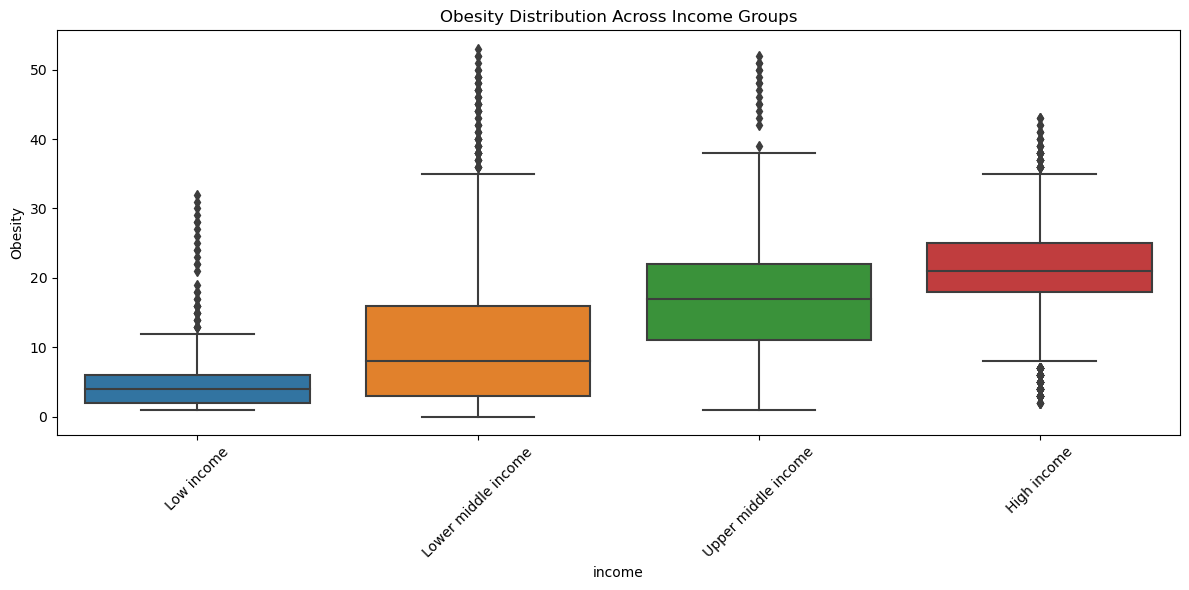

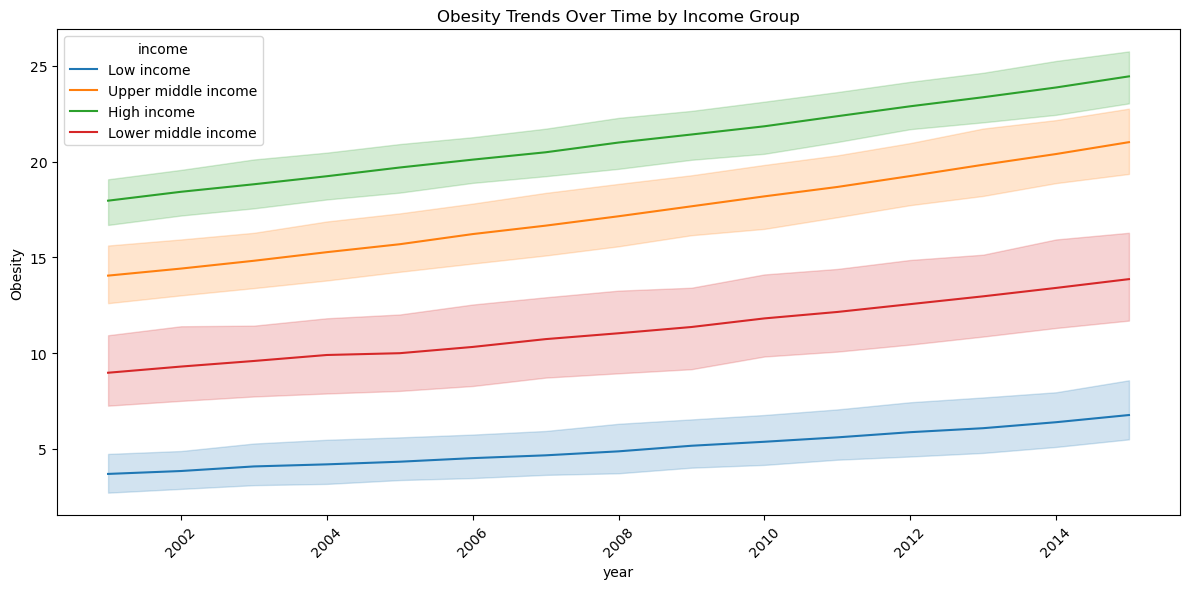

In [25]:
# Create visualization for obesity trends across income groups
# Calculate medians for each income group
medians = reshaped_df.groupby('income')['Obesity'].median().sort_values()
order = medians.index.tolist()
#plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=reshaped_df, x='income', y='Obesity',order=order)
plt.title('Obesity Distribution Across Income Groups')
plt.xticks(rotation=45)
plt.tight_layout()

# Time series trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=reshaped_df, x='year', y='Obesity', hue='income')
plt.title('Obesity Trends Over Time by Income Group')
plt.xticks(rotation=45)
plt.tight_layout()

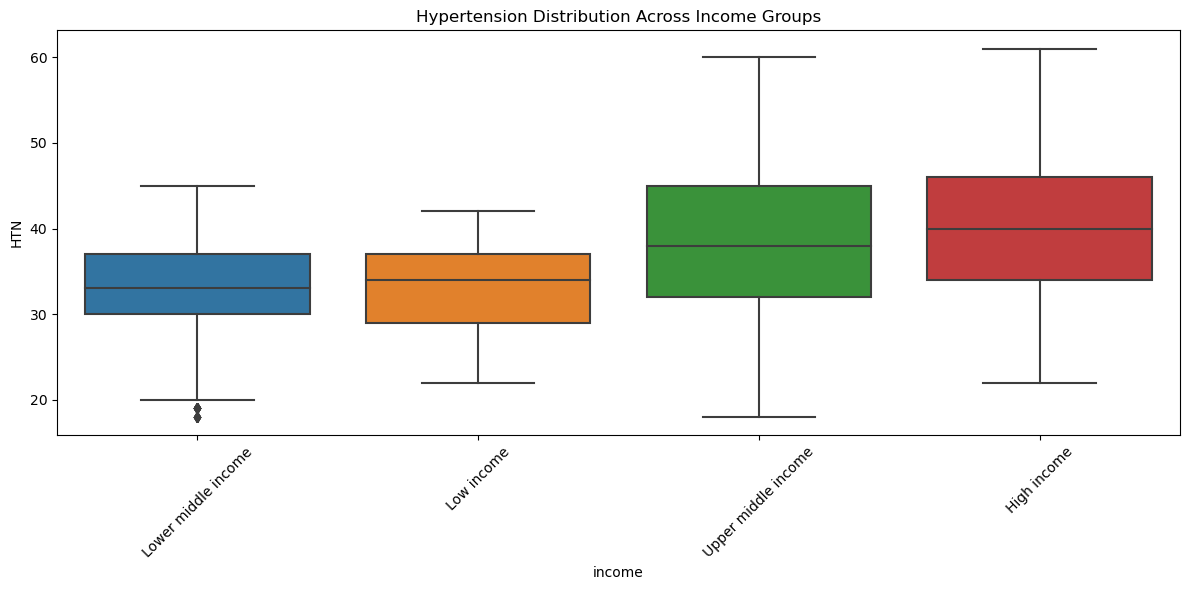

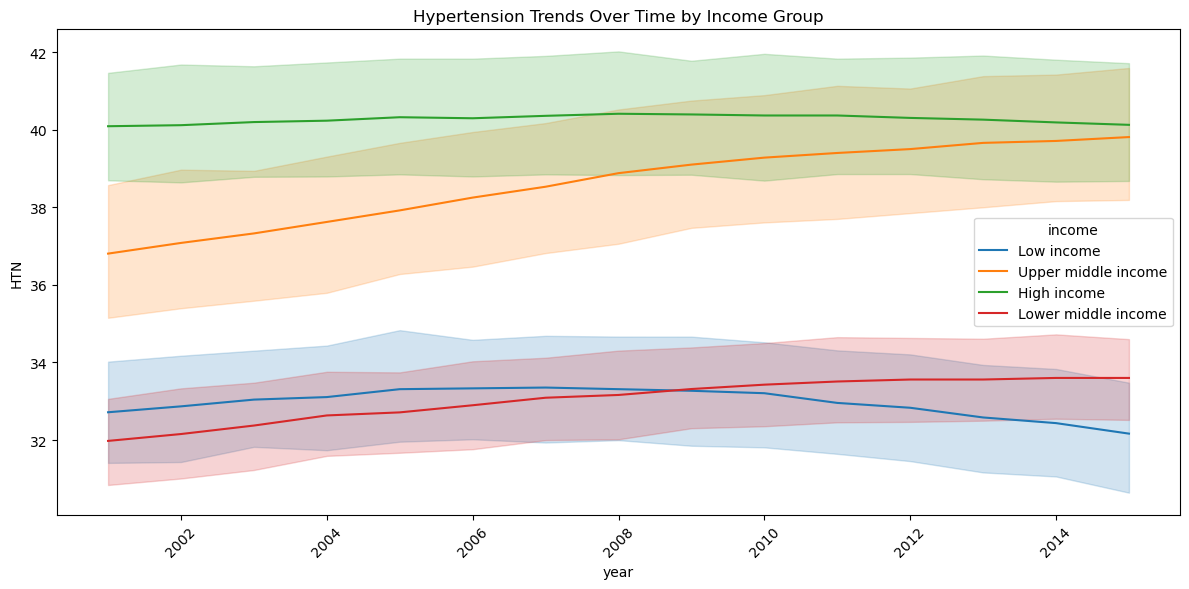

In [26]:
# Create visualization for obesity trends across income groups

# Calculate medians for each income group
medians = reshaped_df.groupby('income')['HTN'].median().sort_values()
order = medians.index.tolist()
#plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=reshaped_df, x='income', y='HTN', order=order)
plt.title('Hypertension Distribution Across Income Groups')
plt.xticks(rotation=45)
plt.tight_layout()

# Time series trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=reshaped_df, x='year', y='HTN', hue='income')
plt.title('Hypertension Trends Over Time by Income Group')
plt.xticks(rotation=45)
plt.tight_layout()

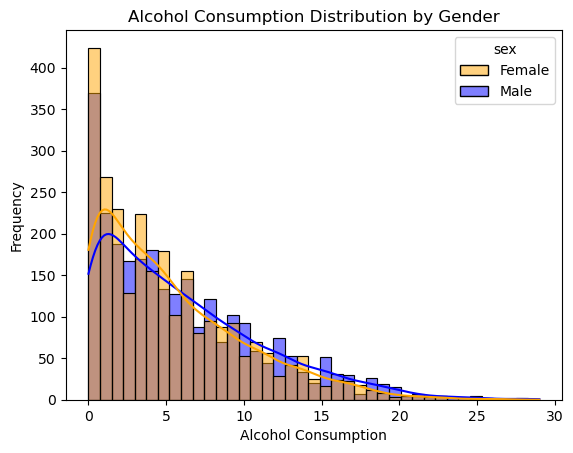

In [27]:
reshaped_df['sex'] = reshaped_df['sex'].astype('category')
# Example: Distribution of Alcohol Consumption by Gender
sns.histplot(data=reshaped_df, x='Alcohol', hue='sex',kde='True',
            palette=['orange','blue'])
plt.title('Alcohol Consumption Distribution by Gender')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.show()

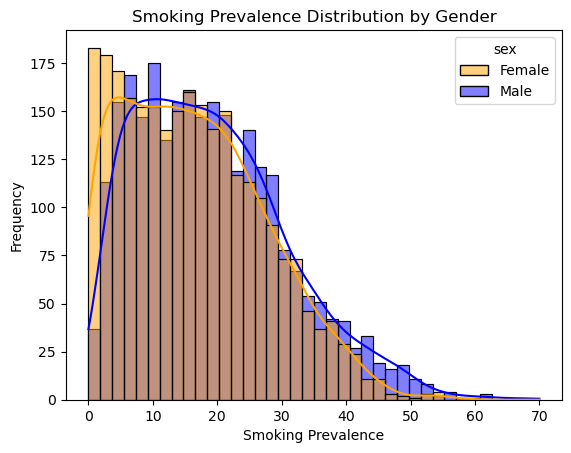

In [28]:
reshaped_df['sex'] = reshaped_df['sex'].astype('category')
# Example: Distribution of Alcohol Consumption by Gender
sns.histplot(data=reshaped_df, x='Smoking', hue='sex',kde='True',
            palette=['orange','blue'])
plt.title('Smoking Prevalence Distribution by Gender')
plt.xlabel('Smoking Prevalence')
plt.ylabel('Frequency')
plt.show()

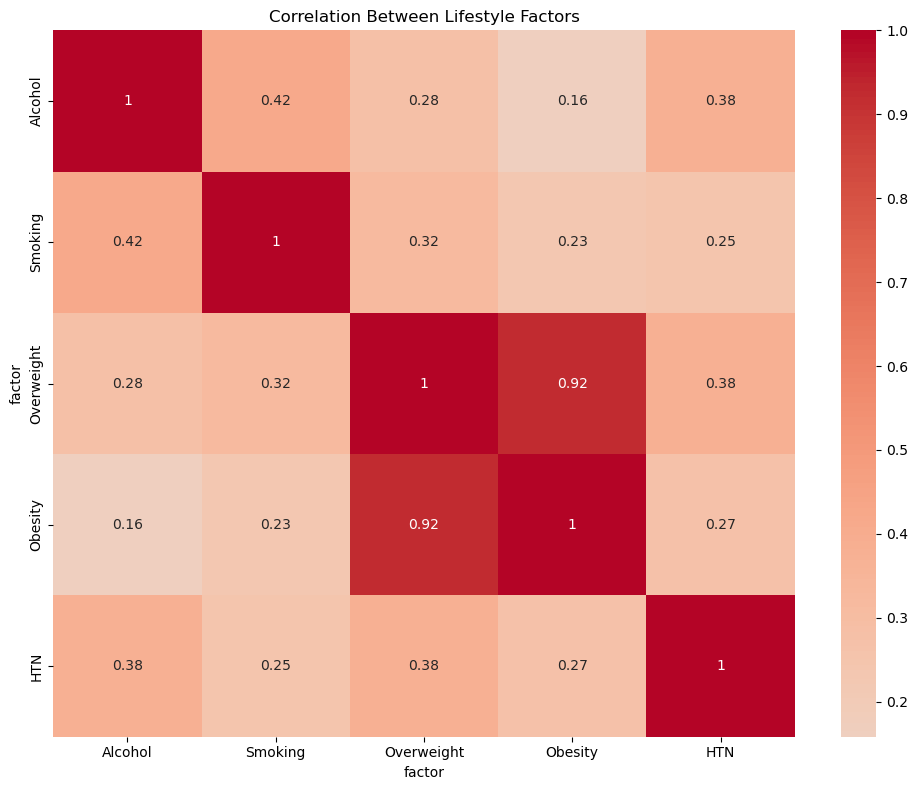

In [29]:
# Create correlation analysis for lifestyle factors
lifestyle_factors = ['Alcohol', 'Smoking','Overweight', 
                   'Obesity', 'HTN']

# Calculate correlations
correlations = reshaped_df[lifestyle_factors].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Lifestyle Factors')
plt.tight_layout()


### Summary
> **Obesity**: 

Obesity as seen increases with income groups , with the first three groups having outliers on the upper side as compare to the high income which has outliers on the lower and upper side. The ranges overlap across the goups 
In terms of time we see an increasing trend across the 4 income groups as the years progress 

> **Hypertension**:

Hypertension as seen increases with the increase in level of the income groups, with only the low income group having outliers on the lower side. 
In terms of time we see an increasing trend across the 3 of the income groups apart from low income group as the years progress. The low income group start with higher numbers as compared to lower middle income group but at around 2009 there is an overlap between low income and low middle income , with the low income earners droping and the lower middle picking in numbers. The high income earners and the higher middle, both increase over time  with high income being higher than the latter, as the trend progresses we see a reduction in the gap between these two groups, and an overlap of the prevalence at some point.

> **Alcohol Consumption**

With alcohol consumption ranging from 0 to 70 liters we see our population is right skewed. In as much as the alcohol consumption reduces across both groups, it is noticeable that men consume more alcohol as compared to men. 

> **Smoking Prevalence**

From the graph observed we see our population is right skewed. In as much as the smoking prevalance reduces across both groups , it noticeable that men tend to be smoking more than women.  

> **Correlation**

There is high correlation being overweight and obesity. There seem to be a correlation between Hypertension and alcohol consumption, smoking, overweight and the occurrence of obesity though not high.

## Statistical Analysis I 

Here we intend to explore the relationship between lifestyle factors i.e smoking, alcohol consumption and overweight,sex, obesity and Hypertension prevalence across different income groups.
We intend to answer the question of whether there is positive relation between these factors and prevalence of hypertension

In [30]:
#Model 1
model = sm. OLS.from_formula('HTN ~Alcohol', data=reshaped_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HTN   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     879.2
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          5.26e-179
Time:                        09:20:34   Log-Likelihood:                -18286.
No. Observations:                5346   AIC:                         3.658e+04
Df Residuals:                    5344   BIC:                         3.659e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4851      0.152    220.033      0.000      33.187      33.783
Alcohol        0.6019      0.020     29.651      0.000       0.562       0.642
==============================================================================
Omnibus:                       13.633   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.544
Skew:                           0.112   Prob(JB):                      0.00115
Kurtosis:                       2.895   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Model 2
model1 = sm. OLS.from_formula('HTN ~Alcohol +Smoking', data=reshaped_df)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HTN   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     474.9
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          1.50e-190
Time:                        09:20:34   Log-Likelihood:                -18256.
No. Observations:                5346   AIC:                         3.652e+04
Df Residuals:                    5343   BIC:                         3.654e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.5529      0.193    168.755      0.000      32.175      32.931
Alcohol        0.5295      0.022     23.828      0.000       0.486       0.573
Smoking        0.0753      0.010      7.793      0.000       0.056       0.094
==============================================================================
Omnibus:                        8.449   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.337
Skew:                           0.082   Prob(JB):                       0.0155
Kurtosis:                       2.897   Cond. No.                         42.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Model 3
model2 = sm. OLS.from_formula('HTN ~Alcohol +Smoking +Obesity', data=reshaped_df)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HTN   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     418.7
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          2.61e-244
Time:                        09:20:34   Log-Likelihood:                -18129.
No. Observations:                5346   AIC:                         3.627e+04
Df Residuals:                    5342   BIC:                         3.629e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.7180      0.220    139.598      0.000      30.287      31.149
Alcohol        0.5045      0.022     23.191      0.000       0.462       0.547
Smoking        0.0473      0.010      4.929      0.000       0.028       0.066
Obesity        0.1628      0.010     16.136      0.000       0.143       0.183
==============================================================================
Omnibus:                        6.971   Durbin-Watson:                   0.540
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.248
Skew:                           0.032   Prob(JB):                       0.0440
Kurtosis:                       2.845   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Model 4
model3 = sm. OLS.from_formula('HTN ~Alcohol +sex +Smoking +Obesity', data=reshaped_df)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HTN   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     341.0
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          8.36e-262
Time:                        09:20:34   Log-Likelihood:                -18085.
No. Observations:                5346   AIC:                         3.618e+04
Df Residuals:                    5341   BIC:                         3.621e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.5256      0.253    116.822      0.000      29.030      30.021
sex[T.Male]     1.9717      0.211      9.360      0.000       1.559       2.385
Alcohol         0.4933      0.022     22.822      0.000       0.451       0.536
Smoking         0.0316      0.010      3.275      0.001       0.013       0.051
Obesity         0.1988      0.011     18.542      0.000       0.178       0.220
==============================================================================
Omnibus:                       18.441   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.287
Skew:                           0.008   Prob(JB):                     0.000790
Kurtosis:                       2.747   Cond. No.                         79.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#Model 5
model4 = sm. OLS.from_formula('HTN ~Alcohol +sex +Smoking +Obesity + Overweight', data=reshaped_df)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HTN   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     346.4
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          2.12e-322
Time:                        09:20:34   Log-Likelihood:                -17942.
No. Observations:                5346   AIC:                         3.590e+04
Df Residuals:                    5340   BIC:                         3.594e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.7686      0.294     91.030      0.000      26.192      27.345
sex[T.Male]     0.0868      0.233      0.373      0.709      -0.370       0.543
Alcohol         0.3945      0.022     18.079      0.000       0.352       0.437
Smoking         0.0151      0.009      1.597      0.110      -0.003       0.034
Obesity        -0.2984      0.031     -9.672      0.000      -0.359      -0.238
Overweight      0.2855      0.017     17.128      0.000       0.253       0.318
==============================================================================
Omnibus:                       10.070   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.897
Skew:                          -0.089   Prob(JB):                      0.00709
Kurtosis:                       2.888   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Model 6
# Lifestyle factors affecting Hypertension
model5 = sm.OLS.from_formula(
    'HTN ~ Alcohol * income + sex * income + Smoking * income + Obesity * income + Overweight * income',
    data=reshaped_df
)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HTN   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     128.3
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:20:34   Log-Likelihood:                -17514.
No. Observations:                5346   AIC:                         3.508e+04
Df Residuals:                    5322   BIC:                         3.523e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    26.4644      0.933     28.379      0.000      24.636      28.293
income[T.Low income]                         10.5859      1.442      7.342      0.000       7.759      13.412
income[T.Lower middle income]                 8.3876      1.118      7.504      0.000       6.197      10.579
income[T.Upper middle income]                -3.2017      1.229     -2.605      0.009      -5.611      -0.792
sex[T.Male]                                   3.1940      0.555      5.756      0.000       2.106       4.282
sex[T.Male]:income[T.Low income]             -4.2032      0.794     -5.295      0.000      -5.759      -2.647
sex[T.Male]:income[T.Lower middle income]    -3.7676      0.666     -5.656      0.000      -5.073      -2.462
sex[T.Male]:income[T.Upper middle income]    -2.8707      0.731     -3.925      0.000      -4.304      -1.437
Alcohol                                       0.2763      0.036      7.589      0.000       0.205       0.348
Alcohol:income[T.Low income]                 -0.4784      0.076     -6.323      0.000      -0.627      -0.330
Alcohol:income[T.Lower middle income]        -0.3111      0.062     -5.005      0.000      -0.433      -0.189
Alcohol:income[T.Upper middle income]         0.2517      0.056      4.530      0.000       0.143       0.361
Smoking                                       0.2218      0.021     10.454      0.000       0.180       0.263
Smoking:income[T.Low income]                 -0.2025      0.040     -5.091      0.000      -0.280      -0.124
Smoking:income[T.Lower middle income]        -0.3680      0.026    -14.308      0.000      -0.418      -0.318
Smoking:income[T.Upper middle income]        -0.1519      0.026     -5.826      0.000      -0.203      -0.101
Obesity                                      -0.2264      0.065     -3.497      0.000      -0.353      -0.099
Obesity:income[T.Low income]                  1.1593      0.181      6.421      0.000       0.805       1.513
Obesity:income[T.Lower middle income]         0.2379      0.085      2.788      0.005       0.071       0.405
Obesity:income[T.Upper middle income]         0.2041      0.088      2.329      0.020       0.032       0.376
Overweight                                    0.1760      0.041      4.287      0.000       0.096       0.257
Overweight:income[T.Low income]              -0.5515      0.089     -6.168      0.000      -0.727      -0.376
Overweight:income[T.Lower middle income]     -0.1554      0.053     -2.937      0.003      -0.259      -0.052
Overweight:income[T.Upper middle income]      0.0609      0.053      1.141      0.254      -0.044       0.166
==============================================================================
Omnibus:                       25.

### Summary
There is a total of 6 models, starting from one with only one predictor variable to build up to one with all variables correlated with income variable . 
From the models:

**1. Basic Model (Alcohol only):**
- Alcohol has a significant positive relationship with HTN (β = 0.602, p < 0.001), as alcohol consumption increases by 1 liter the hypertension prevalence increases by 0.602 units.
- The model explains 14.1% of variance (R² = 0.141)

**2. Adding Smoking:**
- Alcohol remains significant but coefficient decreases (β = 0.530, p < 0.001)
- Smoking has a small but significant effect (β = 0.075, p < 0.001)
- Slight improvement in R² to 0.151

**3. Adding Obesity:**
- All variables remain significant
- Obesity shows a notable effect (β = 0.163, p < 0.001)
- R² increases to 0.190

**4. Adding Sex:**
- Being male increases HTN (β = 1.972, p < 0.001)
- Other variables remain significant
- R² increases to 0.203

**5. Adding Overweight:**
- There is a in Obesity to a negative correlation with HTN  (β = -0.298)
- Here the Sex becomes non-significant 
- Overweight shows positive effect (β = 0.286, p < 0.001)
- R² increases to 0.245

**6. Final Model with Income Interactions:**
- Substantial improvement in R² to 0.357
- Notable findings:
  - Low income has large positive main effect (β = 10.586)
  - Income moderates the effects of other variables
  - Male effect varies by income level
  - Alcohol and smoking effects differ across income groups which is supported by our previous findings 

#### **Conclusion**

Of the factors considered in the final model, we can conclude that they do affect the occurrence of hypertension
The impact of lifestyle factors on hypertension is highly influenced by income level, which accounts for 35.7% of the difference in hypertension. Given that the same risk variables have varying effects across income levels, this implies that efforts for preventing hypertension should be customized based on socioeconomic groups.

## Statistical Analysis II 

In [36]:
# Relationship between death and  major diseases and health behaviours and treatments
#import relevant libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#one-hot encoding 
data_encoded = pd.get_dummies(reshaped_df, columns=['sex','income'], drop_first=True)
#list of columns
data_encoded.columns

Index(['country', 'year', 'Alcohol', 'Smoking', 'HTN', 'Obesity', 'Overweight',
       'Probability of Dying', 'HTN Treatment', 'Underweight', 'HTN Status',
       'sex_Male', 'income_Low income', 'income_Lower middle income',
       'income_Upper middle income'],
      dtype='object')

In [37]:
#Fitting the model
# Define the X and y
X = data_encoded[['Alcohol','Smoking' ,'Obesity','HTN Treatment']]
y = data_encoded['Probability of Dying']

#Fitting the model on the datset 
model = LinearRegression() 
model.fit(X,y)
#Make prediction 
y_pred = model.predict(X)

#The intercept
print('Model Intercept:\n', model.intercept_)

#Coefficients
coefficients = model.coef_
feature_names = X.columns.values

#Printing the coefficients
print('Coefficients:\n')
for feature, coefficient in zip(feature_names, coefficients):
    print(f'{feature}: {coefficient: .3f}')

# getting the mean squared error
print('\nMean squared error: %2f' % mean_squared_error(y, y_pred))

#getting the coefficient of determination
print('\nR-squared: %2f' % r2_score(y, y_pred))

Model Intercept:
 30.49657616165632
Coefficients:

Alcohol: -0.044
Smoking:  0.118
Obesity:  0.135
HTN Treatment: -0.349

Mean squared error: 60.426404

R-squared: 0.327785


In [38]:
#Fitting the model
# Create the interaction term
data_encoded['Alcohol_Smoking_Interaction'] = data_encoded['Alcohol'] * data_encoded['Smoking']

# Define X and y, including the interaction term
X = data_encoded[['Alcohol', 'Smoking', 'Obesity', 'HTN Treatment', 'Alcohol_Smoking_Interaction']]
y = data_encoded['Probability of Dying']

#Fitting the model on the datset 
model = LinearRegression() 
model.fit(X,y)
#Make prediction 
y_pred = model.predict(X)

#The intercept
print('Model Intercept:\n', model.intercept_)

#Coefficients
coefficients = model.coef_
feature_names = X.columns.values

#Printing the coefficients
print('Coefficients:\n')
for feature, coefficient in zip(feature_names, coefficients):
    print(f'{feature}: {coefficient: .3f}')

# getting the mean squared error
print('\nMean squared error: %2f' % mean_squared_error(y, y_pred))

#getting the coefficient of determination
print('\nR-squared: %2f' % r2_score(y, y_pred))

Model Intercept:
 31.71586736934927
Coefficients:

Alcohol: -0.339
Smoking:  0.056
Obesity:  0.135
HTN Treatment: -0.349
Alcohol_Smoking_Interaction:  0.012

Mean squared error: 59.882256

R-squared: 0.333838


In [39]:
# Define X and y, including the interaction term
X = data_encoded[['Alcohol', 'Smoking', 'Obesity', 'HTN Treatment', 
                  'Alcohol_Smoking_Interaction','sex_Male']]
y = data_encoded['Probability of Dying']

#Fitting the model on the datset 
model = LinearRegression() 
model.fit(X,y)
#Make prediction 
y_pred = model.predict(X)

#The intercept
print('Model Intercept:\n', model.intercept_)

#Coefficients
coefficients = model.coef_
feature_names = X.columns.values

#Printing the coefficients
print('Coefficients:\n')
for feature, coefficient in zip(feature_names, coefficients):
    print(f'{feature}: {coefficient: .3f}')

# getting the mean squared error
print('\nMean squared error: %2f' % mean_squared_error(y, y_pred))

#getting the coefficient of determination
print('\nR-squared: %2f' % r2_score(y, y_pred))

Model Intercept:
 29.009554956674545
Coefficients:

Alcohol: -0.401
Smoking:  0.026
Obesity:  0.158
HTN Treatment: -0.308
Alcohol_Smoking_Interaction:  0.013
sex_Male:  3.599

Mean squared error: 57.410116

R-squared: 0.361340


In [40]:
# Create the interaction term
data_encoded['Alcohol_Smoking_Interaction'] = data_encoded['Alcohol'] * data_encoded['Smoking']
# Define X and y, including the interaction term
X = data_encoded[['Alcohol', 'Smoking', 'Obesity', 'HTN Treatment','Alcohol_Smoking_Interaction',
                  'sex_Male','income_Low income', 'income_Lower middle income',
       'income_Upper middle income']]
y = data_encoded['Probability of Dying']

#Fitting the model on the datset 
model = LinearRegression() 
model.fit(X,y)
#Make prediction 
y_pred = model.predict(X)

#The intercept
print('Model Intercept:\n', model.intercept_)

#Coefficients
coefficients = model.coef_
feature_names = X.columns.values

#Printing the coefficients
print('Coefficients:\n')
for feature, coefficient in zip(feature_names, coefficients):
    print(f'{feature}: {coefficient: .3f}')

# getting the mean squared error
print('\nMean squared error: %2f' % mean_squared_error(y, y_pred))

#getting the coefficient of determination
print('\nR-squared: %2f' % r2_score(y, y_pred))

Model Intercept:
 18.7409613520124
Coefficients:

Alcohol: -0.236
Smoking:  0.026
Obesity:  0.228
HTN Treatment: -0.216
Alcohol_Smoking_Interaction:  0.013
sex_Male:  5.238
income_Low income:  7.973
income_Lower middle income:  7.293
income_Upper middle income:  4.625

Mean squared error: 52.896114

R-squared: 0.411556


#### Summary
We generated 4 different models to assess the relationship between health behaviours and the probability of dying. income and sex were added to the final model as they influence health behaviours significantly.


**Model 1:**
 - The mean squared error of the model is comparatively high at 60.43, suggesting a modest level of prediction accuracy.
With an R-squared of 0.33, the variation in the probability of dying may be explained by 33%.
Significant findings: Alcohol and HTN treatment are protective of mortality, whereas smoking raises it. However, the protective aspect of alcohol consumption is questionable


**Model 2 (with Alcohol-Smoky Interaction):**

- R-squared stays at 0.33 and MSE marginally improves to 59.88, indicating that the interaction term has little impact on prediction accuracy.
The interaction between Alcohol and Smoking has a small positive effect on mortality.


**Model 3 (with Sex added):**

- When sex is added, the MSE falls to 57.41 and the R-squared rises to 0.36, suggesting a better fit.
The odds of dying are considerably higher for men.


**Model 4 (with Income levels included):**

- R-squared rises to 0.41 and MSE continues to improve (52.90), indicating the best match.
While sex continues to play a significant influence, income has a considerable impact on mortality, particularly for those with low incomes.


#### Conclusion
Alcohol shows a negative relation with the probability of dying which is not consistent with literature, this could be explained by the huge chunk of missing data we exprienced earlier on
As evidenced by the rise in R-squared and the fall in mean squared error, the model improves by adding interaction terms (such as Alcohol and smoking) and more variables (such as sex and income level).
Particularly important factors include sex and income, with the likelihood of dying being impacted by income level.
The addition of variables enhances the predictiveness of the model, but it still only accounts for less than half of the variability, indicating that more components or more complex modeling may be required for improved prediction.




In [41]:
# Model coefficients from regression
smoking_coef = 0.026
alcohol_coef = -0.236
obesity_coef = 0.228
Treatment_coef = -0.216 

# Percentage decreases
smoking_decrease = 0.05  # 5%
Treatment_decrease = 0.10 # 10%
alcohol_decrease = 0.15  # 15%
obesity_decrease = 0.20  # 20%

# Calculate direct effects of reductions
smoking_impact = smoking_coef * smoking_decrease
Treatment_impact = Treatment_coef * Treatment_decrease
alcohol_impact = alcohol_coef * alcohol_decrease
obesity_impact = obesity_coef * obesity_decrease

# Total direct impact
total_impact = smoking_impact + Treatment_impact + alcohol_impact + obesity_impact

print("Impact of Reductions on Mortality:\n")

print(f"Smoking (5% reduction): {smoking_impact:.4f}")
print(f"Treatment (5% reduction): {Treatment_impact:.4f}")
print(f"Alcohol (15% reduction): {alcohol_impact:.4f}")
print(f"Obesity (20% reduction): {obesity_impact:.4f}")
print(f"Total Direct Impact: {total_impact:.4f}")

Impact of Reductions on Mortality:

Smoking (5% reduction): 0.0013
Treatment (5% reduction): -0.0216
Alcohol (15% reduction): -0.0354
Obesity (20% reduction): 0.0456
Total Direct Impact: -0.0101


#### Summary 
- **Smoking(5 percent reduction) :** the coefficient reduces suggesting the a reduction in smoking is resultant to a reduction in mortality 

- **Treatment (10 percent reduction):** Mortality has clearly increased from -0.216 to -0.0216, highlighting the significance of better access to therapy.

- **Alcohol (15% reduction):** Significantly increases mortality, which as stated earlier goes against expected relationship between alcohol consumption and mortality 

- **Obesity (20% reduction):** a decrease in mortality is seen when obesity reduces.
Overall Direct Impact: combined modifications lead to a net decrease in mortality.


## Conclusion and Recommendations

### Conclusion
- From the Above Analysis there is clear relationship between the lifestyle behaviours and the occurrence of hypertension.
- It is important to note that the gender and income level also affects the prevalence and the mortality from hypertension significantly. 
- most of these factors are modifiable and as illustrated above , an increase in treatment , a decrease in smokin and obesity could show a significant decrease in mortality.
- From the positive association between these factors as seen in Statistical analysis 1 and the prevalence of hypertension it is noted that a decrease in these factors would probably reduce the prevalence of hypertension
- Health outcomes can be significantly impacted by targeted public health programs that emphasize quitting smoking, drinking less alcohol, and having more access to treatment for hypertension.
- These results provide important information for public health initiatives by highlighting the crucial role that lifestyle changes and treatment accessibility have in lowering the prevalence and mortality risks of hypertension. 

### Recommendations
- Inclusion of other factors such as physical activity in future analysis to get a better picture on the relationship.
- In our first model the Durbin-Watson statistic (0.425) indicates positive autocorrelation, this could be explained with the way we handled missing data by interpolation hence the recommendation that
Future work would benefit from utilizing more data from populations. This would allow us to generalize the data and increase the accuracy of prediction.

